# PREDICTION OF FLOWER SPECIES

Le jeu de données Iris
L'ensemble de données Iris est un ensemble de données classique des années 1930 ; c'est l'un des premiers exemples modernes de classification statistique.

L'ensemble de données est une collection de mesures morphologiques de plusieurs fleurs d'iris. Ces mesures nous permettront de distinguer plusieurs espèces de fleurs. Aujourd'hui, les espèces sont identifiées par leurs empreintes génétiques, mais dans les années 1930, le rôle de l'ADN dans la génétique n'avait pas encore été découvert.

150 observations
4 caractéristiques (toutes mesurées en centimètres)
longueur des sépales
largeur des sépales
longueur des pétales
largeur des pétales
La variable de réponse est l'espèce d'iris
Setosa
Versicolor
Virginie
Problème de classification puisque la réponse est catégorique

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white")

from sklearn import model_selection
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm  
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [14]:
df=pd.read_csv('iris.csv', encoding='utf-8')
df.head(15)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Distribution

# VISUALIZATION

C:\Users\Envy x360\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Envy x360\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Envy x360\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

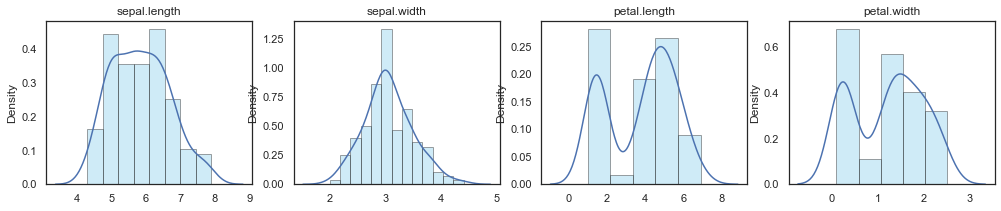

In [10]:
attr = df.iloc[:,:-1]

def dist_plot(df, attributes, n_rows, n_cols):
    fig = plt.figure(figsize=(17,3))
    for i, attributes in enumerate(attributes):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.distplot(df[attributes],hist_kws=dict(edgecolor="k", linewidth=1,color='skyblue'))
        plt.title(attributes)
        plt.xlabel('')
        
dist_plot(df, attr.columns, 1, 4)

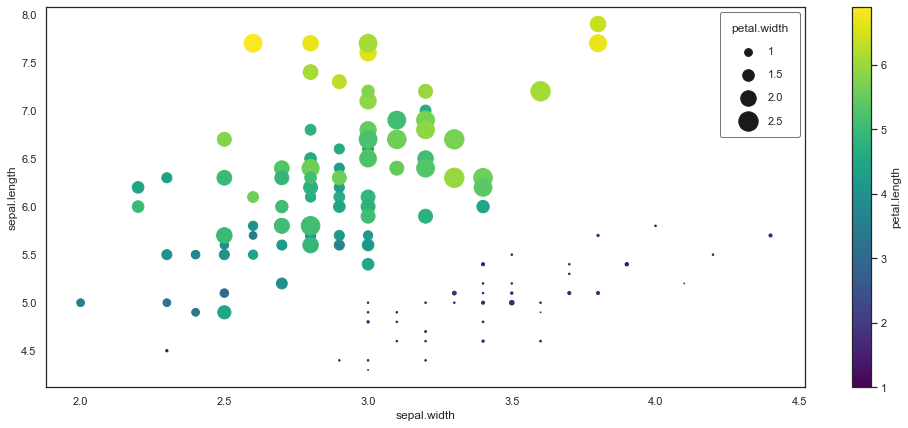

In [16]:
plt.rc("figure", figsize=(17, 7))
plt.scatter(df['sepal.width'], df['sepal.length'], 
            c = df['petal.length'], s=(df['petal.width']**2)*60, cmap='viridis')
ax = plt.gca()
plt.colorbar(label="petal.length")
plt.xlabel("sepal.width")
plt.ylabel("sepal.length")

# legend
pws = [0.5, 1, 1.5, 2., 2.5]
for pw in pws:
    plt.scatter([], [], s=(pw**2)*60, c="k",label=str(pw))
h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[1:], l[1:], labelspacing=1.2, title="petal.width", borderpad=1, 
          frameon=True, framealpha=0.6, edgecolor="k", facecolor="w")
plt.show()

## Corrélations entre les variétés

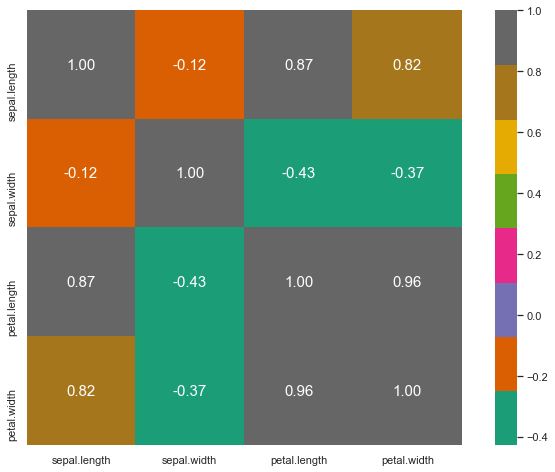

In [32]:
plt.figure(figsize=(12,8)) 
# Heatmap with input as the correlation matrix calculted by(df.corr())
sns.heatmap(X.corr(),cbar = True, square = True, annot=True, fmt='.2f',annot_kws={'size': 15},cmap='Dark2') 
plt.show()

# K-nearest neighbors (KNN) Classification

Je diviserai l'ensemble de données en deux, dont 70 % j'utiliserai pour entraîner nos modèles et 30 % que je retiendrai comme ensemble de données de validation.

In [21]:
X=df.drop(['variety'],axis=1)
y=df['variety']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=7)

n_neighbors = 7 indique à l'objet knn que lorsqu'il exécute l'algorithme des k voisins les plus proches, il doit rechercher les "sept" voisins les plus proches et est connu sous le nom de paramètre de réglage ou d'hyperparamètre.

In [24]:
# Instantiate the estimator
knn = KNeighborsClassifier(n_neighbors = 7, metric='minkowski',p=2,)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Fitting classifier to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

## Predict the response for a new observation

Les nouvelles observations sont appelées données « hors échantillon »
utilise les informations qu'il a apprises au cours du processus de formation du modèle

In [25]:
y_pred = knn.predict(X_test)

## Précision

In [30]:
print('La précision de KNN Classifier est de {:,.2%} sur les données d entraînement'.format(knn.score(X_train, y_train)))
print('La précision de KNN Classifier est de {:,.2%} sur les données de test'.format(knn.score(X_test, y_test)))

La précision de KNN Classifier est de 97.14% sur les données d entraînement
La précision de KNN Classifier est de 95.56% sur les données de test


In [31]:
from sklearn.metrics import accuracy_score
print ('La précision de KNN Classifier est de {:,.2%}'.format(accuracy_score(y_test,y_pred)))

La précision de KNN Classifier est de 95.56%


## Classification Report

In [34]:
species_names = ['Setosa','Versicolour','Virginica']

# Make predictions on validation dataset
print('\nClasification Report\n',classification_report(y_test, y_pred,target_names=species_names, digits=4))


Clasification Report
               precision    recall  f1-score   support

      Setosa     1.0000    1.0000    1.0000        12
 Versicolour     0.8889    1.0000    0.9412        16
   Virginica     1.0000    0.8824    0.9375        17

    accuracy                         0.9556        45
   macro avg     0.9630    0.9608    0.9596        45
weighted avg     0.9605    0.9556    0.9555        45



The accuracy of the KNN 1 is 0.93
The accuracy of the KNN 2 is 0.91
The accuracy of the KNN 3 is 0.91
The accuracy of the KNN 4 is 0.91
The accuracy of the KNN 5 is 0.91
The accuracy of the KNN 6 is 0.91
The accuracy of the KNN 7 is 0.96
The accuracy of the KNN 8 is 0.93
The accuracy of the KNN 9 is 0.93
The accuracy of the KNN 10 is 0.93
The accuracy of the KNN 11 is 0.93
The accuracy of the KNN 12 is 0.93
The accuracy of the KNN 13 is 0.91
The accuracy of the KNN 14 is 0.93
The accuracy of the KNN 15 is 0.93
The accuracy of the KNN 16 is 0.93
The accuracy of the KNN 17 is 0.89
The accuracy of the KNN 18 is 0.91
The accuracy of the KNN 19 is 0.89
The accuracy of the KNN 20 is 0.89
The accuracy of the KNN 21 is 0.87
The accuracy of the KNN 22 is 0.87
The accuracy of the KNN 23 is 0.89
The accuracy of the KNN 24 is 0.89
The accuracy of the KNN 25 is 0.89


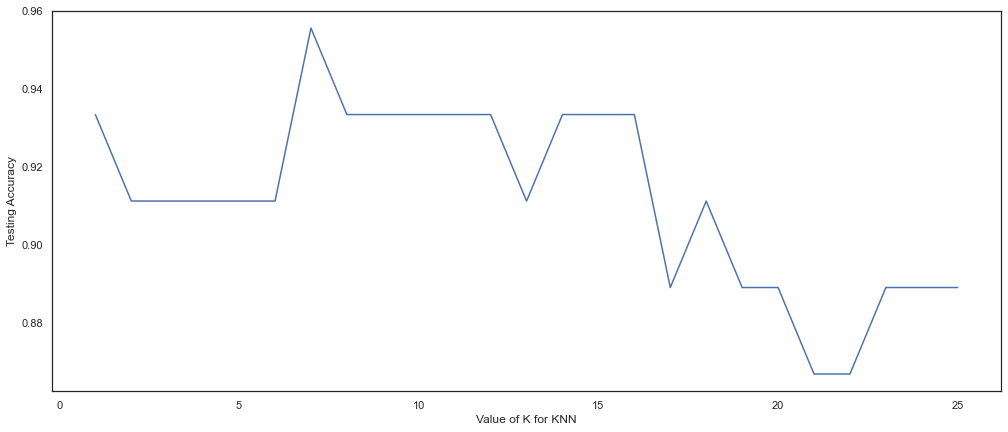

In [37]:
# Try K=1 through K=25 and record testing accuracy
scores = []
k_range = list(range(1, 26))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('The accuracy of the KNN {} is {:,.2f}'.format( k, accuracy_score(y_test,y_pred)))
    scores.append(accuracy_score(y_test, y_pred))

# Plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()